# Precipitation in Jeddah

Jeddah had been in the news over the last month for the unusual amount of rain that flooded the city.
In this note book I will be exploring precipitation patterns in the city of Jeddah.

First, we import the data and look at statistics about the data. Also, we define functions that we will use later.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
def remove_iqr_outliers(data):
    d = data[data.precip != 0]
    q1, q3 = np.percentile(d.precip,[25,75])
    IQR = q3 - q1
    lower_fence = q1 - (1.5 * IQR)
    upper_fence = q3 + (1.5 * IQR)
    g = data[~((data.precip > upper_fence) | (data.precip < lower_fence))]
    q = g[~g.precip.isna()]
    return q

In [3]:
def iqr_outliers(data):
    d = data[data.precip != 0]
    q1, q3 = np.percentile(d,[25,75])
    IQR = q3 - q1
    lower_fence = q1 - (1.5 * IQR)
    upper_fence = q3 + (1.5 * IQR)
    g = data[(data.precip > upper_fence) | (data.precip < lower_fence)]
    q = g[~g.precip.isna()]
    return q

In [4]:
data = pd.read_csv('jeddah 2000-01-01 to 2023-01-22.csv', parse_dates=['datetime'])
data.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,jeddah,2000-01-01,32.3,20.7,25.6,31.0,20.7,25.4,16.5,60.5,...,NaN,NaN,NaN,2000-01-01T07:01:08,2000-01-01T17:51:56,0.89,Clear,Clear conditions throughout the day.,clear-day,"41024099999,41030099999"
1,jeddah,2000-01-02,32.3,19.1,25.1,30.9,19.1,24.7,13.6,52.6,...,NaN,NaN,NaN,2000-01-02T07:01:28,2000-01-02T17:52:34,0.93,Clear,Clear conditions throughout the day.,clear-day,"41024099999,41030099999"
2,jeddah,2000-01-03,31.9,19.3,25.5,32.2,19.3,25.9,16.5,58.9,...,NaN,NaN,NaN,2000-01-03T07:01:46,2000-01-03T17:53:12,0.96,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"41024099999,41030099999"
3,jeddah,2000-01-04,33.1,23.1,27.2,34.7,23.1,28.2,20.9,70.0,...,NaN,NaN,NaN,2000-01-04T07:02:03,2000-01-04T17:53:51,0.98,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"41024099999,41030099999"
4,jeddah,2000-01-05,31.9,21.8,25.7,33.5,21.8,26.1,19.6,70.8,...,NaN,NaN,NaN,2000-01-05T07:02:19,2000-01-05T17:54:30,1.00,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"41024099999,41030099999"


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8423 entries, 0 to 8422
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              8423 non-null   object        
 1   datetime          8423 non-null   datetime64[ns]
 2   tempmax           8423 non-null   float64       
 3   tempmin           8423 non-null   float64       
 4   temp              8423 non-null   float64       
 5   feelslikemax      8423 non-null   float64       
 6   feelslikemin      8423 non-null   float64       
 7   feelslike         8423 non-null   float64       
 8   dew               8423 non-null   float64       
 9   humidity          8423 non-null   float64       
 10  precip            4770 non-null   float64       
 11  precipprob        8423 non-null   float64       
 12  precipcover       8423 non-null   float64       
 13  preciptype        245 non-null    object        
 14  snow              378 no

In [6]:
data.isna().sum()

name                   0
datetime               0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip              3653
precipprob             0
precipcover            0
preciptype          8178
snow                8045
snowdepth           8044
windgust            7955
windspeed              0
winddir                0
sealevelpressure       7
cloudcover             0
visibility             1
solarradiation      3653
solarenergy         3653
uvindex             3653
severerisk          8045
sunrise                0
sunset                 0
moonphase              0
conditions             0
description            0
icon                   0
stations              14
dtype: int64

In [7]:
data[data.precip.isna()].tail()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
3648,jeddah,2009-12-27,32.1,21.1,25.7,32.5,21.1,26.2,18.9,68.0,...,NaN,NaN,NaN,2009-12-27T06:59:28,2009-12-27T17:49:16,0.39,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"41024099999,41030099999"
3649,jeddah,2009-12-28,33.2,20.9,26.0,32.0,20.9,25.8,16.8,61.0,...,NaN,NaN,NaN,2009-12-28T06:59:52,2009-12-28T17:49:51,0.43,Clear,Clear conditions throughout the day.,clear-day,"41024099999,41030099999"
3650,jeddah,2009-12-29,29.9,20.9,25.5,30.8,20.9,25.7,18.8,68.9,...,NaN,NaN,NaN,2009-12-29T07:00:16,2009-12-29T17:50:26,0.46,Clear,Clear conditions throughout the day.,clear-day,"41024099999,41030099999"
3651,jeddah,2009-12-30,29.3,20.1,24.6,30.7,20.1,24.9,18.6,71.1,...,NaN,NaN,NaN,2009-12-30T07:00:38,2009-12-30T17:51:02,0.49,Clear,Clear conditions throughout the day.,clear-day,"41024099999,41030099999"
3652,jeddah,2009-12-31,28.2,20.9,24.1,27.9,20.9,24.1,16.3,63.3,...,NaN,NaN,NaN,2009-12-31T07:00:59,2009-12-31T17:51:39,0.50,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"41024099999,41030099999"


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
tempmax,8423.0,34.756678,4.377694,20.8,31.40,35.2,38.00,50.2
tempmin,8423.0,24.590431,4.014583,6.6,21.90,24.9,27.60,34.0
temp,8423.0,29.381634,3.859501,17.7,26.30,29.9,32.70,38.6
feelslikemax,8423.0,37.740793,6.849940,20.8,32.10,38.0,43.00,65.6
feelslikemin,8423.0,25.676529,5.546736,1.8,21.90,24.9,29.70,45.4
feelslike,8423.0,31.577466,5.887943,17.7,26.50,31.7,36.30,51.6
dew,8423.0,18.770486,4.417663,-2.4,16.30,19.3,22.00,29.3
humidity,8423.0,55.749638,10.388795,17.1,48.80,56.6,63.30,88.0
precip,4770.0,0.117421,0.921357,0.0,0.00,0.0,0.00,33.5
precipprob,8423.0,2.859539,16.642183,0.0,0.00,0.0,0.00,100.0


## Data Preparation

We choose the parameters relevant to our analysis, remove outliers and add time features to make the visualization easier.

In [9]:
df = data[['datetime','precip']]
df

,datetime,precip
0,2000-01-01,NaN
1,2000-01-02,NaN
2,2000-01-03,NaN
3,2000-01-04,NaN
4,2000-01-05,NaN
...,...,...
8418,2023-01-18,0.0
8419,2023-01-19,0.0
8420,2023-01-20,0.0
8421,2023-01-21,0.0


In [10]:
df['month'] = df.datetime.dt.month
df['year'] = df.datetime.dt.year
df['weekday'] = df.datetime.dt.weekday
df = df[df.year > 2009].reset_index()
df = df.iloc[:4756]
season_dict = {1: 'Winter',
               2: 'Winter',
               3: 'Spring', 
               4: 'Spring',
               5: 'Spring',
               6: 'Summer',
               7: 'Summer',
               8: 'Summer',
               9: 'Fall',
               10: 'Fall',
               11: 'Fall',
               12: 'Winter'}
df['season'] = df['month'].apply(lambda x: season_dict[x])
df['weekday'] = df['weekday'].map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})
df

,index,datetime,precip,month,year,weekday,season
0,3653,2010-01-01,0.0,1,2010,Friday,Winter
1,3654,2010-01-02,0.0,1,2010,Saturday,Winter
2,3655,2010-01-03,0.0,1,2010,Sunday,Winter
3,3656,2010-01-04,0.0,1,2010,Monday,Winter
4,3657,2010-01-05,0.0,1,2010,Tuesday,Winter
...,...,...,...,...,...,...,...
4751,8404,2023-01-04,7.2,1,2023,Wednesday,Winter
4752,8405,2023-01-05,0.6,1,2023,Thursday,Winter
4753,8406,2023-01-06,0.0,1,2023,Friday,Winter
4754,8407,2023-01-07,0.0,1,2023,Saturday,Winter


The entries before 2010 were removed because there is no data on precipitation before 2010. The data after 2023-01-08 was removed because it’s a forecast.

In [11]:
monthlydf = df[['datetime','precip']].set_index('datetime').resample('M').sum()
yearlydf = df[['datetime','precip']].set_index('datetime').resample('Y').sum()
dailydf = df[['datetime','precip']].set_index('datetime')
df_no_outliers = remove_iqr_outliers(df)

## Precipitation volume over time

Here we look at the amount of precipitation over the years.

In [12]:
df[df.precip > 0].precip.count()

240

In the last 13 years Jeddah saw 240 rainy days.

In [13]:
df.precip.sum()

559.5

And received 559.5 mm of rain.

<AxesSubplot:xlabel='datetime', ylabel='precip'>

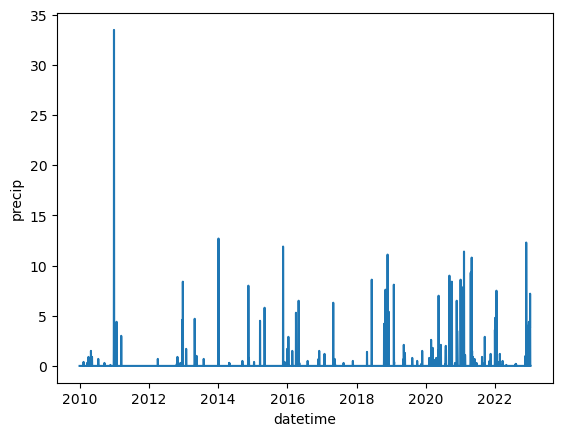

In [14]:
sns.lineplot(dailydf, x='datetime',y='precip')

<AxesSubplot:xlabel='datetime', ylabel='precip'>

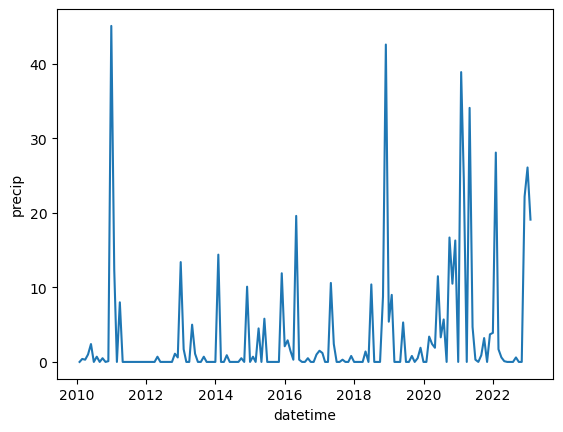

In [15]:
sns.lineplot(monthlydf, x='datetime',y='precip')

<AxesSubplot:xlabel='year', ylabel='precip'>

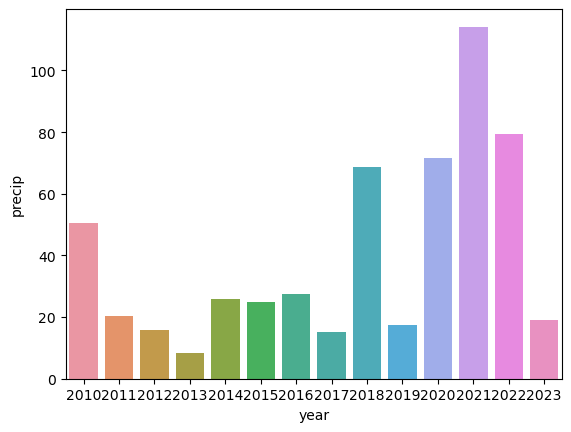

In [16]:
sns.barplot(df.groupby('year').precip.sum().reset_index(), x='year', y='precip')

The monthly precipitation for each year.

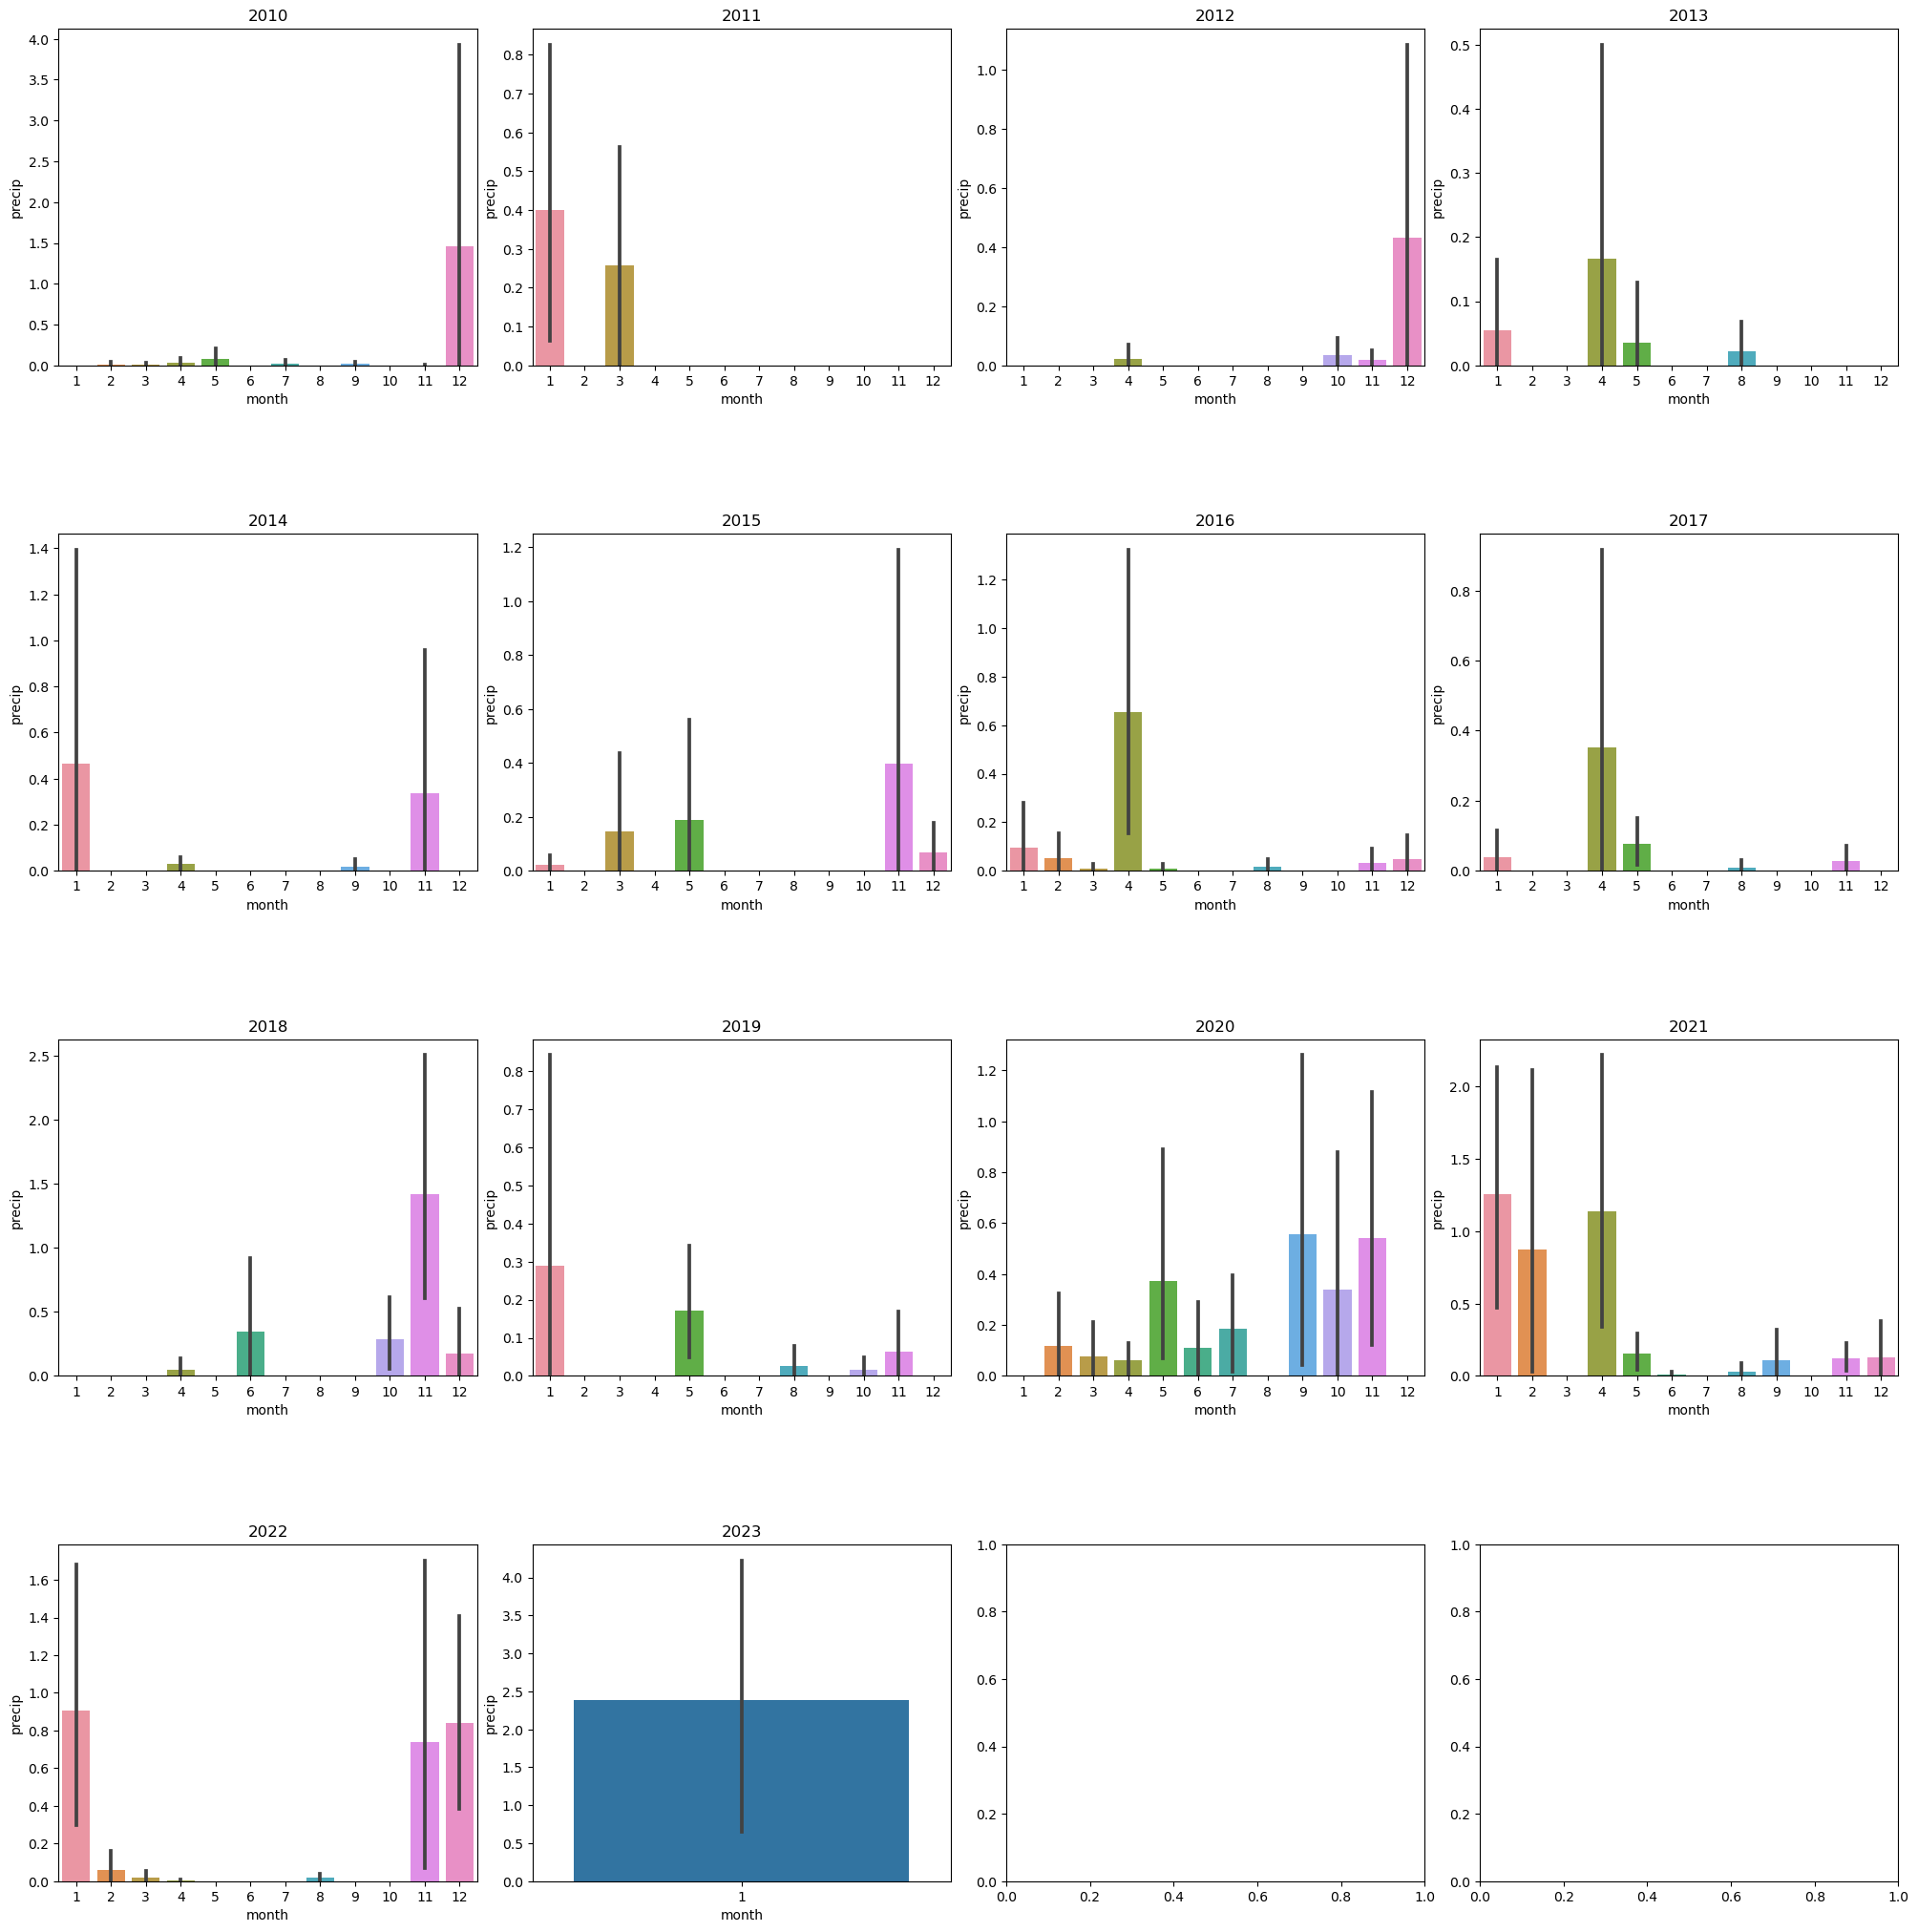

In [17]:
year = df.year.unique()
fig, axes = plt.subplots(4,4,figsize=(20,20))
fig.tight_layout()
plt.subplots_adjust(hspace=0.5)
for i, y in enumerate(year):
     if i < 4:
        sns.barplot(df[df.year == y], x='month', y='precip', ax=axes[0][i]).set(title=f'{y}')
     if i >= 4 and i < 8:
        sns.barplot(df[df.year == y], x='month', y='precip', ax=axes[1][i-4]).set(title=f'{y}')
     if i >= 8 and i < 12:
        sns.barplot(df[df.year == y], x='month', y='precip', ax=axes[2][i-8]).set(title=f'{y}')
     if i >= 12:  
        sns.barplot(df[df.year == y], x='month', y='precip', ax=axes[3][i-12]).set(title=f'{y}')

## Precipitation patterns

Here we explore the patterns of precipitation.

<AxesSubplot:xlabel='season', ylabel='precip'>

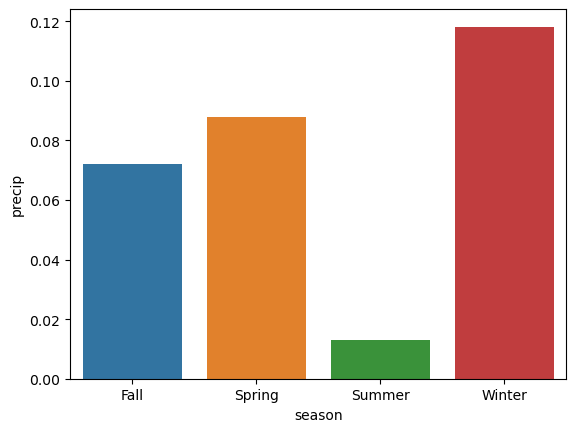

In [18]:
sns.barplot(df_no_outliers.groupby('season').precip.mean().reset_index(), x='season', y='precip')

Most of the precipitation is received in the winter, fall is second.

<AxesSubplot:xlabel='month', ylabel='precip'>

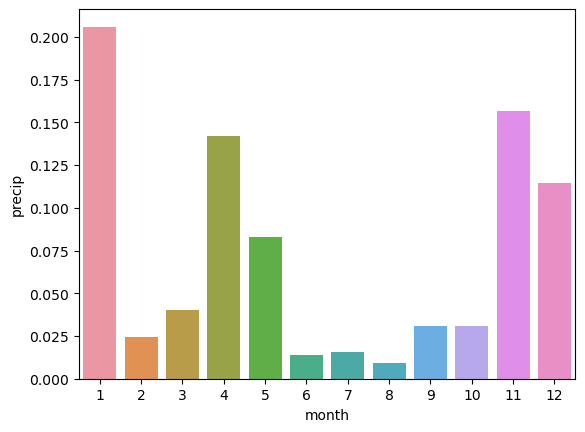

In [19]:
sns.barplot(df_no_outliers.groupby('month').precip.mean().reset_index(), x='month', y='precip')

The months with the most rainfall are November December and January. April is also seeing a large volume of precipitation.

<AxesSubplot:xlabel='weekday', ylabel='precip'>

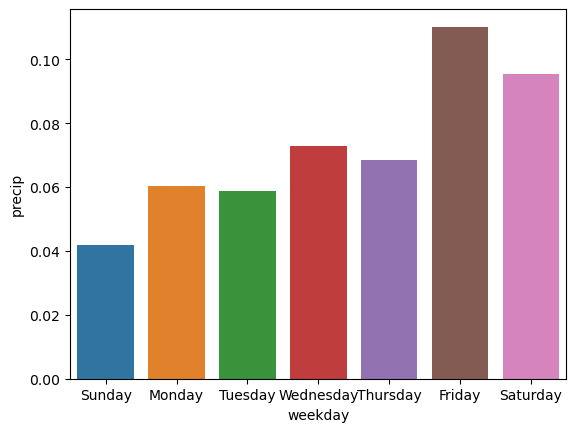

In [20]:
sns.barplot(df_no_outliers.groupby('weekday').mean().reset_index(), x='weekday', y='precip', order=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

In [21]:
df[df.precip > 0].weekday.value_counts()

Friday       45
Saturday     41
Thursday     34
Wednesday    33
Monday       31
Tuesday      31
Sunday       25
Name: weekday, dtype: int64

<AxesSubplot:xlabel='weekday', ylabel='Count'>

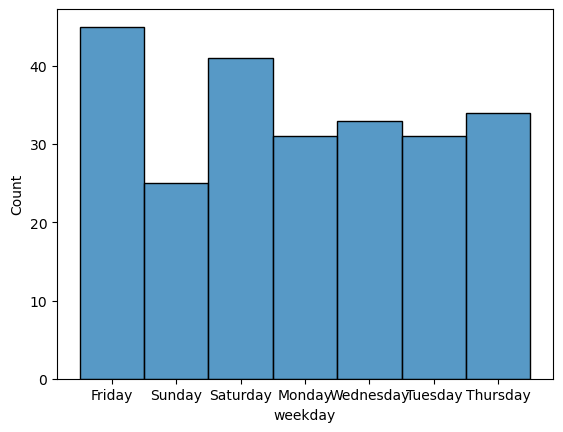

In [22]:
sns.histplot(df[df.precip > 0].weekday)

Friday sees heavier precipitation than other days of the week. It’s also the rainiest day. 45 days out of 240.

## Distributions and Statistics

Here we look at how the data is distributed and some statistics about the data.

<AxesSubplot:ylabel='Count'>

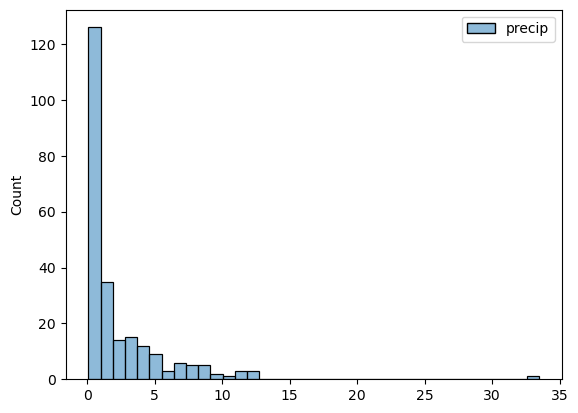

In [23]:
sns.histplot(dailydf[dailydf != 0])

<AxesSubplot:>

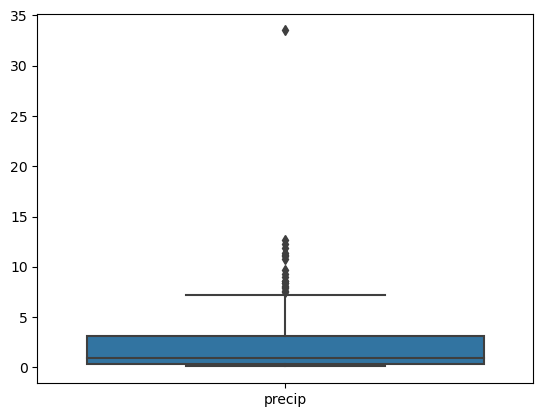

In [24]:
sns.boxplot(dailydf[dailydf.precip != 0])

In [25]:
dailydf.max()

precip    33.5
dtype: float64

In [26]:
df_no_outliers[df_no_outliers.precip != 0].precip.mean()

1.5613636363636372

The average rainy day receives 1.56 mm of rainfall.

In [27]:
iqr_outliers(dailydf)

,precip
datetime,
2010-12-29,9.7
2010-12-30,33.5
2012-12-25,8.4
2014-01-05,12.7
2014-11-16,8.0
2015-11-17,11.9
2018-06-09,8.6
2018-11-01,7.6
2018-11-23,11.1


Year 2021 had the highest number of outlier (days 6). the highest precipitation in a day was in 2010, 33.5 mm in one day.

<AxesSubplot:ylabel='Count'>

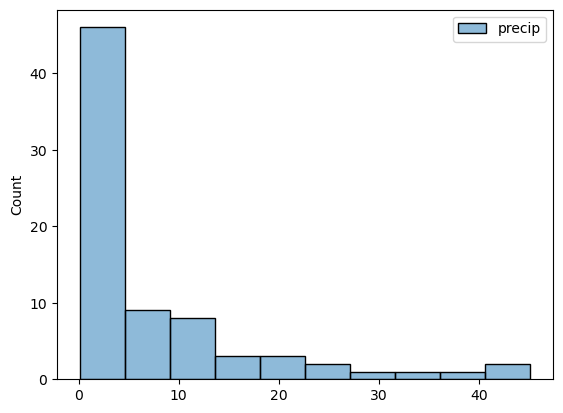

In [28]:
sns.histplot(monthlydf[monthlydf != 0])

<AxesSubplot:>

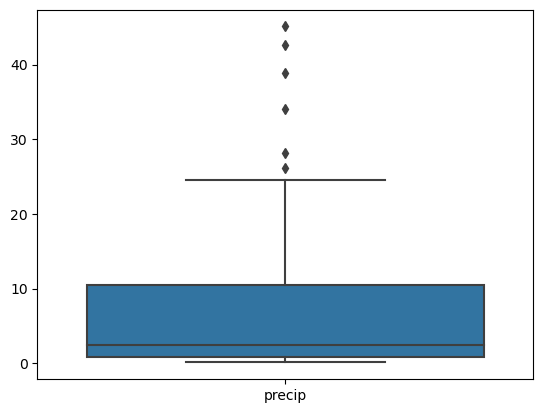

In [29]:
sns.boxplot(monthlydf[monthlydf.precip != 0])

In [30]:
monthlydf.max()

precip    45.1
dtype: float64

In [31]:
df_no_outliers.groupby(['year','month']).precip.sum().mean()

2.1878980891719757

The average month receives 24.53 mm of rainfall.

In [32]:
iqr_outliers(monthlydf)

,precip
datetime,
2010-12-31,45.1
2018-11-30,42.6
2021-01-31,38.9
2021-04-30,34.1
2022-01-31,28.1
2022-12-31,26.1


<AxesSubplot:ylabel='Count'>

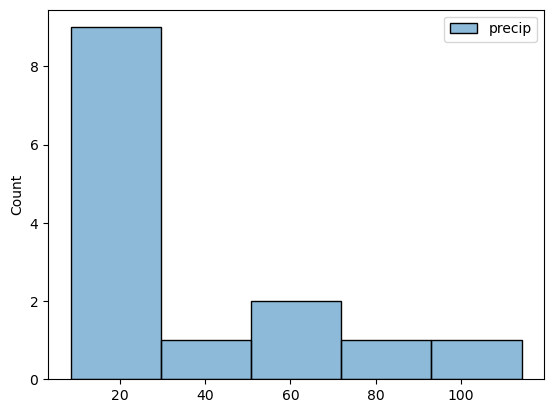

In [33]:
sns.histplot(yearlydf)

<AxesSubplot:>

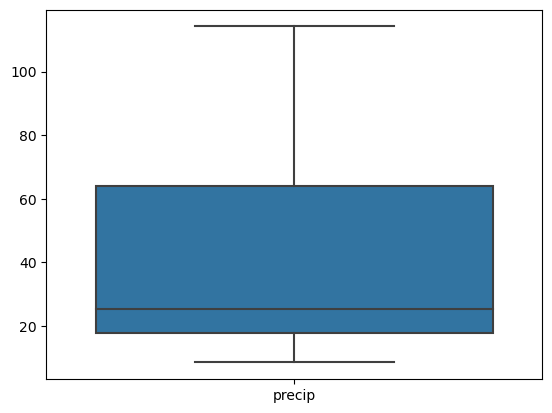

In [34]:
sns.boxplot(yearlydf)

There are no outlier years.

In [35]:
yearlydf.max()

precip    114.2
dtype: float64

In [36]:
df_no_outliers.groupby('year').precip.sum().mean()

24.53571428571429

The average year receives 24.53 mm of rainfall.

## Further Analysis

Here we look at December 2010, the month with the highest precipitation in the last 13 years.

<AxesSubplot:xlabel='datetime', ylabel='precip'>

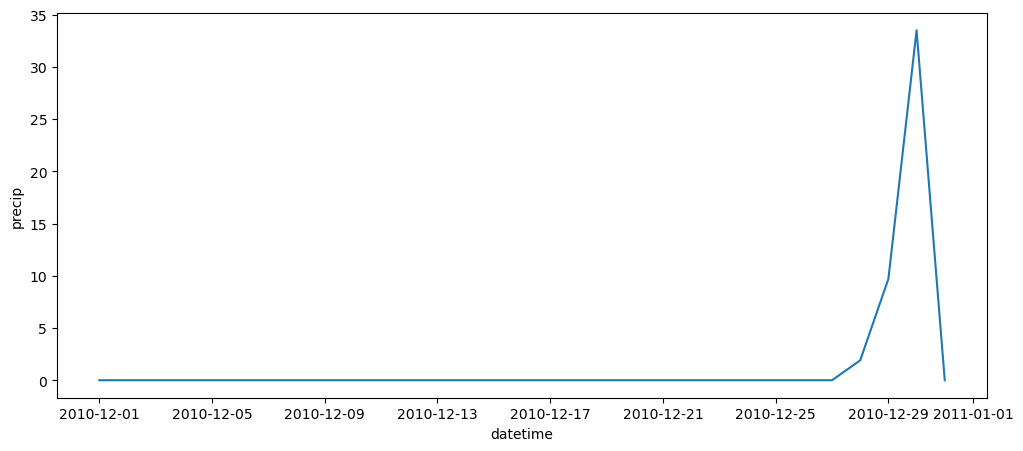

In [37]:
plt.figure(figsize=(12,5))
sns.lineplot(df[(df.month == 12) & (df.year == 2010)], x='datetime', y='precip')

In [38]:
df[(df.datetime > '2010-12-1') & (df.datetime < '2011-01-03')]

,index,datetime,precip,month,year,weekday,season
335,3988,2010-12-02,0.0,12,2010,Thursday,Winter
336,3989,2010-12-03,0.0,12,2010,Friday,Winter
337,3990,2010-12-04,0.0,12,2010,Saturday,Winter
338,3991,2010-12-05,0.0,12,2010,Sunday,Winter
339,3992,2010-12-06,0.0,12,2010,Monday,Winter
340,3993,2010-12-07,0.0,12,2010,Tuesday,Winter
341,3994,2010-12-08,0.0,12,2010,Wednesday,Winter
342,3995,2010-12-09,0.0,12,2010,Thursday,Winter
343,3996,2010-12-10,0.0,12,2010,Friday,Winter
344,3997,2010-12-11,0.0,12,2010,Saturday,Winter


The week from 2010-12-27 to 2011-01-2 received more precipitation than the average year, all the of which fell in the days December 28, 29 and 30.